# **Electrocardiography (ECG) Scan - Classification Heart Diseases Diagnosis**
### **Abdallah Fekry**
**Model 17**

---

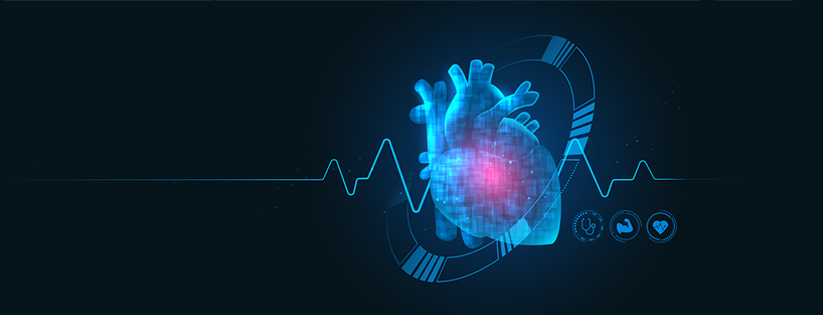

#### Classes

In [82]:
classes = {0:'Normal beat', 
           1:'Supraventricular premature beat', 
           2:'Premature ventricular contraction', 
           3:"Fusion of ventricular and normal beat", 
           4:'Unclassifiable beat'}
classes[0]

'Normal beat'

#### Importing Libraries

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from time import process_time

In [36]:
# decorator
def line():
  print()
  print("_"*80)
  print()

#### Read data

In [5]:
indexes=range(188)
df_train=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',names=indexes)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_test = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',names=indexes)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
print(df_train.isnull().sum().sum())
df_train.isnull().sum()

0


0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [56]:
print(df_test.isnull().sum().sum())
df_test.isnull().sum()

0


0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [61]:
df_train.iloc[:,-1].unique()

array([0., 1., 2., 3., 4.])

In [62]:
df_test.iloc[:,-1].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
# df_train.head()
df_train=df_train.fillna(0)
df_test=df_test.fillna(0)

## Splitting data

In [24]:
# splitting dataas input & output
x_train=df_train.iloc[:,0:-1]
y_train=df_train.iloc[:,-1]
x_test=df_test.iloc[:,0:-1]
y_test=df_test.iloc[:,-1]
print("x train shape:",x_train.shape,
      "\ny train shape:",y_train.shape,
      "\nx test shape:",x_test.shape,
      "\ny test shape:",y_test.shape)

x train shape: (87554, 187) 
y train shape: (87554,) 
x test shape: (21892, 187) 
y test shape: (21892,)


## Plotting Random Sample Data

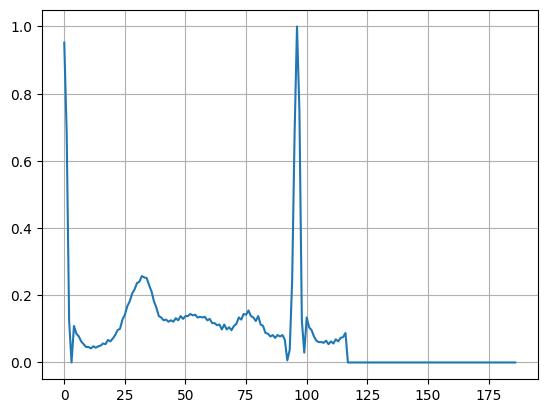

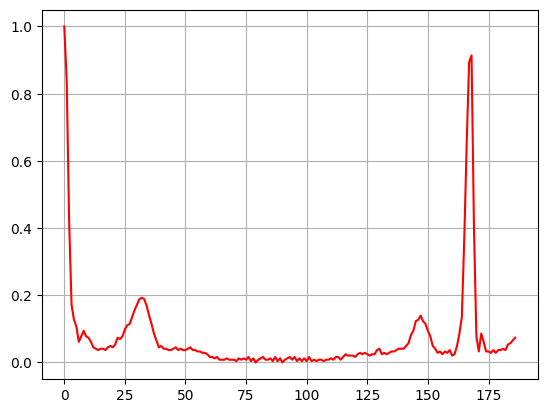

In [35]:
import random
n = random.randint(0,(len(x_train)))
plt.grid()
plt.plot(x_train.iloc[n,:])
plt.show()
n = random.randint(0,(len(x_train)))
plt.grid()
plt.plot(x_train.iloc[n,:],c='r')
plt.show()

---
<h1><center><b>Modeling</b></center></h1>

---

# 1. Logistic Regression

In [40]:
# 1 Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t1 = end-st
yp = model.predict(x_test)
score1 = accuracy_score(y_test,yp)
loss1 = mean_squared_error(y_test,yp)
print("By using Logistic Regression\n\n",
      "Accuracy: ",score1,
      "\nloss function: ",loss1,
      "\nfitting time: ",t1,'s'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')


By using Logistic Regression

Accuracy: 0.91174858395761
loss function: 0.44596199524940616
fitting time: 23.006781604000004s

Confusion Matrix
[[17838    25   200    15    40]
 [  327   197    32     0     0]
 [  905    11   478    26    28]
 [  107     0     8    47     0]
 [  186     0    22     0  1400]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: title={'center': 'Logistic Regression Heatmap'}, xlabel='Predicted', ylabel='Actual'>

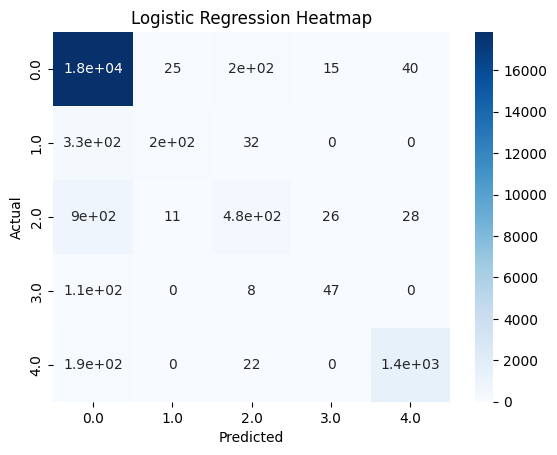

In [44]:
fig = plt.figure()
plt.title("Logistic Regression Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap="Blues")

---

# 2. Support Vector Machine SVM

In [45]:
# 2 Support Vector Machine SVM
from sklearn import svm
model = svm.SVC()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t2 = end-st
yp = model.predict(x_test)
score2 = accuracy_score(y_test,yp)
loss2  = mean_squared_error(y_test,yp)
print("By using Support Vector Machine SVM\n\n",
      "Accuracy: ",score2,
      "\nloss function: ",loss2,
      "\nfitting time: ",t2,'s'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Support Vector Machine SVM

Accuracy: 0.9680248492600037
loss function: 0.18052256532066507
fitting time: 178.552193131s

Confusion Matrix
[[18086    10    17     1     4]
 [  237   314     5     0     0]
 [  170     2  1249    25     2]
 [   71     0    13    78     0]
 [  135     0     8     0  1465]]


<Axes: title={'center': 'SVM Heatmap'}, xlabel='Predicted', ylabel='Actual'>

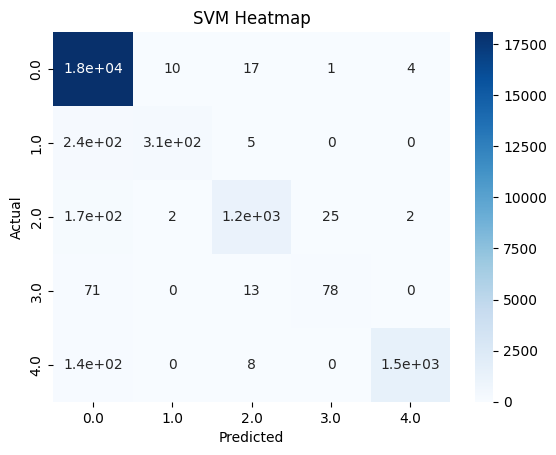

In [46]:
fig = plt.figure()
plt.title("SVM Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

---

# 3. Decision Tree

In [47]:
# 3 Decision Tree
from sklearn import tree
model = tree.DecisionTreeClassifier()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t3 = end-st
yp = model.predict(x_test)
score3 = accuracy_score(y_test,yp)
loss3 = mean_squared_error(y_test,yp)
print("By using Decision Tree\n\n",
      "Accuracy: ",score3,
      "\nloss function: ",loss3,
      "\nfitting time: ",t3,'s'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Decision Tree

Accuracy: 0.9520372738900055
loss function: 0.2296272610999452
fitting time: 42.632097335000026s

Confusion Matrix
[[17635   212   151    53    67]
 [  184   356    11     3     2]
 [  151     8  1244    26    19]
 [   41     1    20    98     2]
 [   76     4    19     0  1509]]


### Plotting Decision Tree

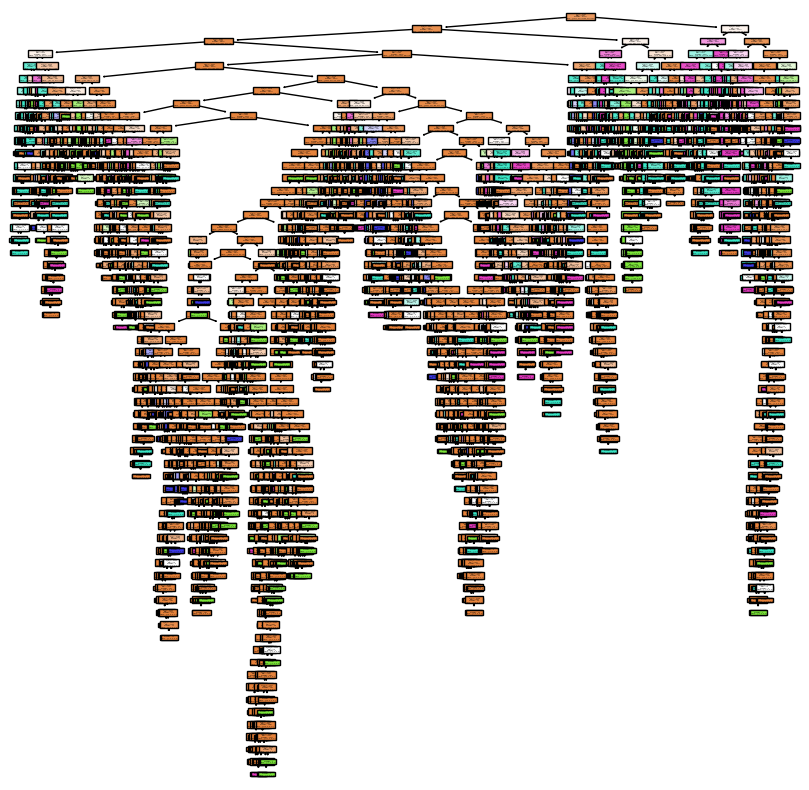

In [48]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)
plt.show()

<Axes: title={'center': 'Decision Tree Heatmap'}, xlabel='Predicted', ylabel='Actual'>

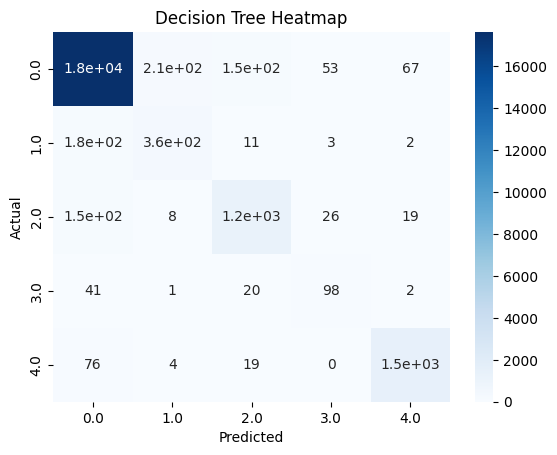

In [49]:
fig = plt.figure()
plt.title("Decision Tree Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

---

# 4. Random Forest
(Best accuracy)

In [50]:
# 4 Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t4 = end-st
yp = model.predict(x_test)
score4 = accuracy_score(y_test,yp)
loss4 = mean_squared_error(y_test,yp)
print("By using Random Forest\n\n",
      "Accuracy: ",score4,
      "\nloss function: ",loss4,
      "\nfitting time: ",t4,'s'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Random Forest

Accuracy: 0.9746025945550886
loss function: 0.12374383336378586
fitting time: 145.616396695s

Confusion Matrix
[[18103     5     8     0     2]
 [  227   327     1     0     1]
 [  146     0  1282    14     6]
 [   48     0    13   101     0]
 [   83     0     2     0  1523]]


<Axes: title={'center': 'Random Forest Heatmap'}, xlabel='Predicted', ylabel='Actual'>

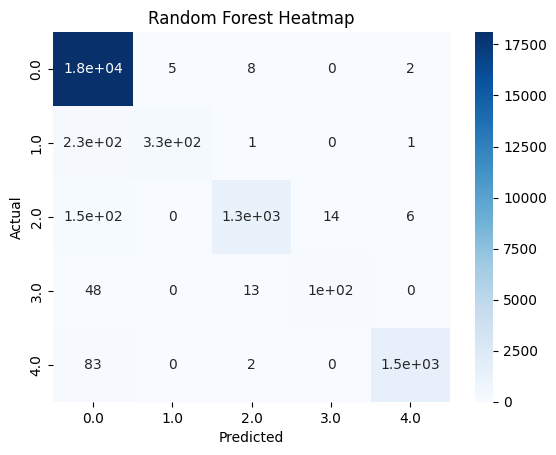

In [52]:
fig = plt.figure()
plt.title("Random Forest Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

### Classification Report

In [86]:
cr = classification_report(y_test, yp)
print(cr)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18118
         1.0       0.98      0.59      0.74       556
         2.0       0.98      0.89      0.93      1448
         3.0       0.88      0.62      0.73       162
         4.0       0.99      0.95      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.81      0.87     21892
weighted avg       0.97      0.97      0.97     21892



---
---

# Best Practice Table

In [54]:
info={
    "Algorithm Name":["Logistic Regression","Support Vector Machine SVM","Decision Tree","Random Forest"],
    "Accuracy":[round(score1*100,3),round(score2*100,3),round(score3*100,3),round(score4*100,3)],
    "Loss Function":[loss1,loss2,loss3,loss4],
    "Fitting Time in second":[str(round(t1,3))+'s',str(round(t2,3))+'s',str(round(t3,3))+'s',str(round(t4,3))+'s']
}

info_df=pd.DataFrame(info)
info_df

,Algorithm Name,Accuracy,Loss Function,Fitting Time in second
0,Logistic Regression,91.175,0.445962,23.007s
1,Support Vector Machine SVM,96.802,0.180523,178.552s
2,Decision Tree,95.204,0.229627,42.632s
3,Random Forest,97.460,0.123744,145.616s


---

# Random testing sampling every run

-> at index number 19374

- Actual value: {yt}
- Predicted value: Class {p1}, {p2}



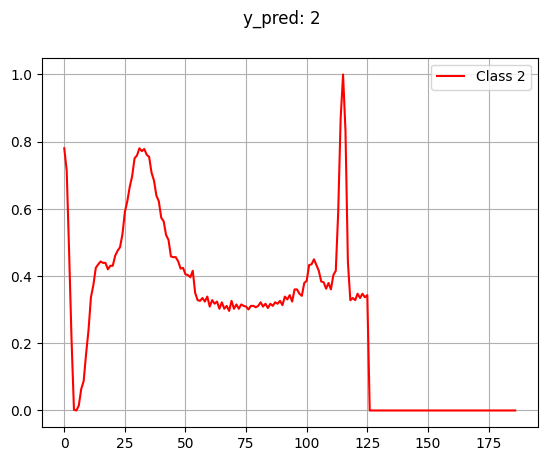

In [113]:
import random
n = random.randint(0,(len(x_test)))
x1 = x_test.iloc[n,:].values
yt = int(y_test.iloc[n])
p1 = int(model.predict(x1.reshape(1,-1))[0])
p2 = classes[p1]
print(f"-> at index number {n}\n\n",
      "- Actual value: {yt}\n",
      "- Predicted value: Class {p1}, {p2}", sep='', end='\n\n')
plt.grid()
plt.plot(x1, label=f"Class {yt}", c='red')
plt.suptitle(f"y_pred: {p1}")
plt.legend(loc='upper right')
plt.show()

---

Saving the trained model

In [121]:
import pickle
with open('/kaggle/working/ECG.pkl', 'wb') as f:
    pickle.dump(model, f)

Downloading

In [123]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'ECG.pkl')

/kaggle/working


/kaggle/working/ECG.pkl

In [128]:
import sklearn
sklearn.__version__

'1.2.2'